<a href="https://colab.research.google.com/github/anushkayeole24/Innomatics-Data-Science-Internship/blob/main/Movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dmov = pd.read_csv("/content/drive/MyDrive/Imdb dataset/movies.csv")

In [6]:
dmov.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
dmov.shape

(9742, 3)

In [8]:
drat = pd.read_csv("/content/drive/MyDrive/Imdb dataset/ratings.csv")

In [9]:
drat.shape

(100836, 4)

In [10]:
counts = drat['userId'].value_counts()

In [11]:
dmov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [12]:
drat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [13]:
drat.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [14]:
num_unique_userid = drat['userId'].nunique()
print(num_unique_userid)

610


In [15]:
drat.describe(include='all')

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [16]:
dmov.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [17]:
movie_ratings_count = drat.groupby('movieId')['rating'].count()
max_rated_movie_id = movie_ratings_count.idxmax()
print(f"The movie with the maximum number of user ratings is Movie ID {max_rated_movie_id}.")

The movie with the maximum number of user ratings is Movie ID 356.


In [18]:
dtag = pd.read_csv("/content/drive/MyDrive/Imdb dataset/tags.csv")

In [19]:
dtag.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [20]:
dtag.shape

(3683, 4)

In [21]:
dmov[dmov['title'] == 'Matrix, The (1999)']

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [22]:
dmov[dmov['title'] == 'Terminator 2: Judgment Day (1991)']

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [23]:
movieId = "589"
title = "Terminator 2: Judgment Day (1991)"
ratings = drat[drat['movieId'] == movieId]
average_rating = ratings['rating'].mean()
print(f"The average user rating for '{title}' is: {average_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: nan


In [24]:
dmov[dmov['title'] == 'Fight Club (1999)']

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [25]:
drat[drat['rating'] == '5.0']

,userId,movieId,rating,timestamp


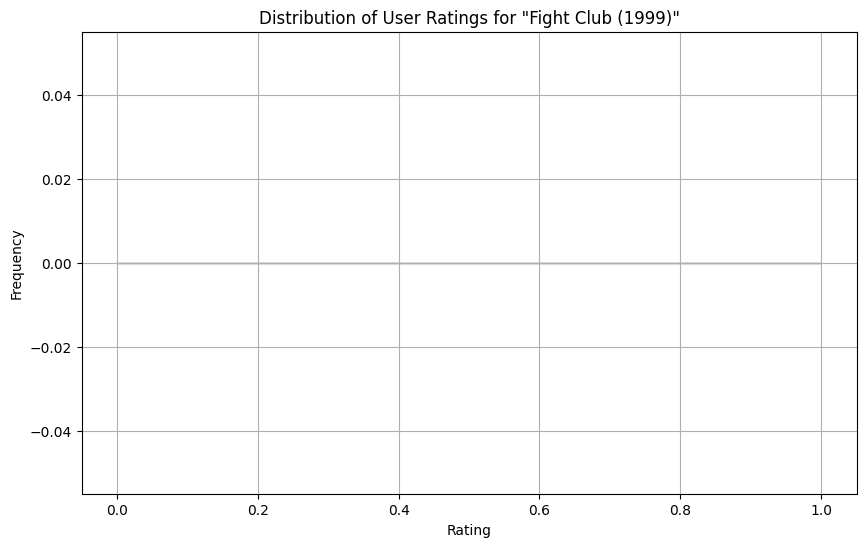

In [26]:
movie_title = "Fight Club (1999)"
movieId = "2959"
movie_ratings = drat[drat['movieId'] == movie_title]
plt.figure(figsize=(10, 6))
plt.hist(movie_ratings['rating'], bins=10, edgecolor='black', alpha=0.7)
plt.title(f'Distribution of User Ratings for "{movie_title}"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

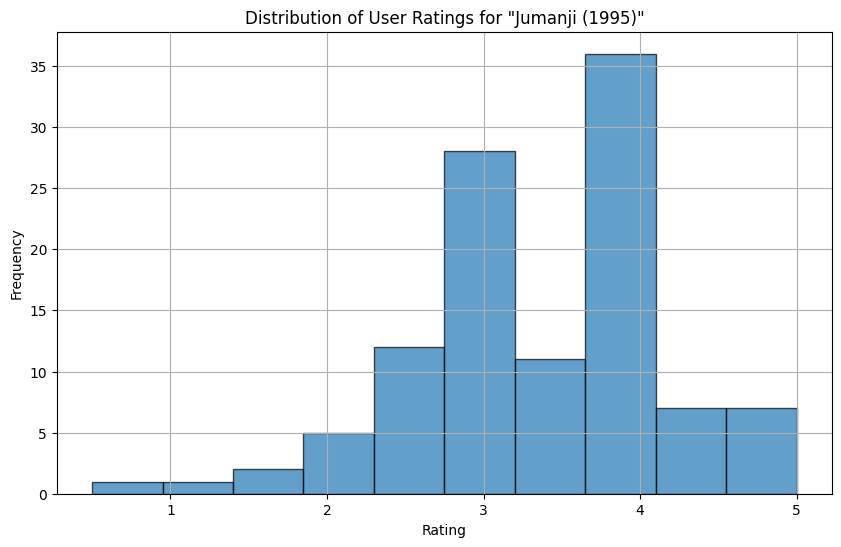

In [27]:
movie_title = "Jumanji (1995)"
merged_df = pd.merge(drat, dmov, on='movieId', how='inner')
movie_ratings = merged_df[merged_df['title'] == movie_title]
plt.figure(figsize=(10, 6))
plt.hist(movie_ratings['rating'], bins=10, edgecolor='black', alpha=0.7)
plt.title(f'Distribution of User Ratings for "{movie_title}"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

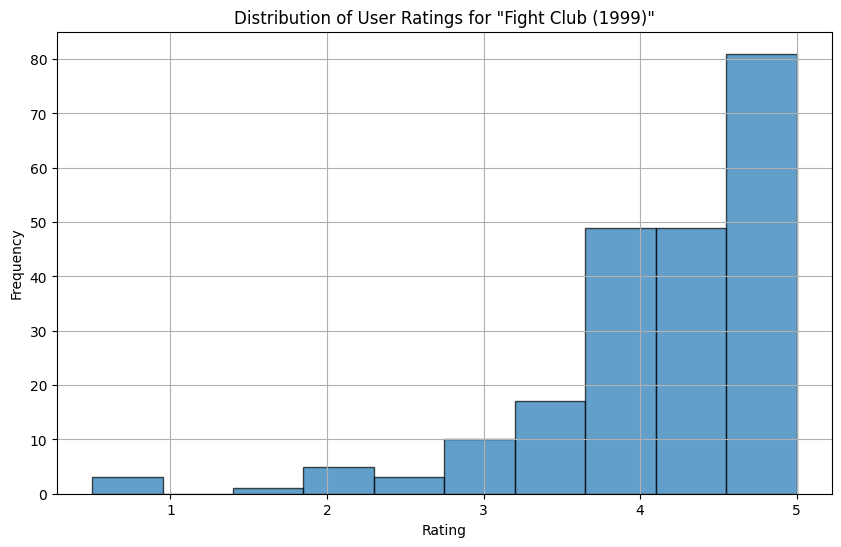

In [28]:

movie_title = "Fight Club (1999)"
merged_df = pd.merge(drat, dmov, on='movieId', how='inner')
movie_ratings = merged_df[merged_df['title'] == movie_title]
plt.figure(figsize=(10, 6))
plt.hist(movie_ratings['rating'], bins=10, edgecolor='black', alpha=0.7)
plt.title(f'Distribution of User Ratings for "{movie_title}"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [29]:
movie_title = "Matrix, The (1999)"
movie_id = dmov.loc[dmov['title'] == movie_title, 'movieId'].iloc[0]
movie_tags = dtag[dtag['movieId'] == movie_id]
print(f"Tags for '{movie_title}':")
print(movie_tags)

Tags for 'Matrix, The (1999)':
      userId  movieId                 tag   timestamp
815      424     2571        martial arts  1457842912
816      424     2571              sci-fi  1457842899
1646     474     2571  alternate universe  1137204991
2794     537     2571          philosophy  1424141098
2795     537     2571    post apocalyptic  1424141101


In [30]:
#aggregation block started
data = {'userId': [1, 2, 1, 3, 2],
        'movieId': [101, 102, 101, 103, 102],
        'rating': [4, 3, 5, 2, 4]}

ratings = pd.DataFrame(drat)

# Grouping by 'movieId' and applying aggregation operations
grouped_ratings = ratings.groupby('movieId').agg({'rating': ['count', 'mean']})

# Renaming the columns for clarity
grouped_ratings.columns = ['rating_count', 'rating_mean']

# Displaying the resulting DataFrame
print(grouped_ratings)

         rating_count  rating_mean
movieId                           
1                 215     3.920930
2                 110     3.431818
3                  52     3.259615
4                   7     2.357143
5                  49     3.071429
...               ...          ...
193581              1     4.000000
193583              1     3.500000
193585              1     3.500000
193587              1     3.500000
193609              1     4.000000

[9724 rows x 2 columns]


In [31]:
import pandas as pd

# Assuming you have a DataFrame named 'ratings' with columns 'userId', 'movieId', and 'rating'
# Replace this with your actual DataFrame and column names

# Sample data
data = {'userId': [1, 2, 1, 3, 2],
        'movieId': [101, 102, 101, 103, 102],
        'rating': [4, 3, 5, 2, 4]}

ratings = pd.DataFrame(drat)

# Mandatory Operation: Grouping by 'movieId' and applying aggregation operations
grouped_ratings = ratings.groupby('movieId').agg({'rating': ['count', 'mean']})

# Renaming the columns for clarity
grouped_ratings.columns = ['rating_count', 'rating_mean']

# Displaying the resulting DataFrame
print(grouped_ratings)

         rating_count  rating_mean
movieId                           
1                 215     3.920930
2                 110     3.431818
3                  52     3.259615
4                   7     2.357143
5                  49     3.071429
...               ...          ...
193581              1     4.000000
193583              1     3.500000
193585              1     3.500000
193587              1     3.500000
193609              1     4.000000

[9724 rows x 2 columns]


In [32]:
movies_data = {'movieId': [101, 102, 103, 104],
               'title': ['Movie A', 'Movie B', 'Movie C', 'Movie D']}

movies = pd.DataFrame(dmov)

# Performing inner join on 'movieId'
merged_df = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

# Displaying the resulting DataFrame
print(merged_df)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9719   193581  Black Butler: Book of the Atlantic (2017)   
9720   193583               No Game No Life: Zero (2017)   
9721   193585                               Flint (2017)   
9722   193587        Bungo Stray Dogs: Dead Apple (2018)   
9723   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  rating_count  rating_mean  
0     Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                      Adventure|Children|Fantasy           110     3.431818  
2                                  Comedy|

In [33]:
filtered_movies = merged_df[merged_df['rating_count'] > 50]

# Displaying the resulting DataFrame
print(filtered_movies)

      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  rating_count  rating_mean  
0     Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                      Adventure|Children|Fantasy           110     3.431818  
2                                  Comedy|Romance            52     3.259615  
5                           Action|Crime|Thriller           102     3.9

In [34]:
grouped_ratings = ratings.groupby('movieId').agg({'rating': ['count', 'mean']})
grouped_ratings.columns = ['rating_count', 'rating_mean']

# Performing inner join on 'movieId'
merged_df = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

# Filter movies with more than 50 user ratings
filtered_movies = merged_df[merged_df['rating_count'] > 50]

# Displaying the resulting DataFrame
print(filtered_movies)

      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  rating_count  rating_mean  
0     Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                      Adventure|Children|Fantasy           110     3.431818  
2                                  Comedy|Romance            52     3.259615  
5                           Action|Crime|Thriller           102     3.9

In [35]:
sorted_movies = filtered_movies.sort_values(by='rating_mean', ascending=False)

most_popular_movie = sorted_movies.head(1)

print(most_popular_movie[['movieId', 'title', 'rating_mean']])

     movieId                             title  rating_mean
277      318  Shawshank Redemption, The (1994)     4.429022


In [36]:
top5_popular_movies = filtered_movies.sort_values(by='rating_count', ascending=False).head(5)

print(top5_popular_movies[['movieId', 'title', 'rating_count']])

      movieId                             title  rating_count
314       356               Forrest Gump (1994)           329
277       318  Shawshank Redemption, The (1994)           317
257       296               Pulp Fiction (1994)           307
510       593  Silence of the Lambs, The (1991)           279
1938     2571                Matrix, The (1999)           278


In [37]:
scifi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi', case=False)]

sorted_scifi_movies = scifi_movies.sort_values(by='rating_count', ascending=False)
third_most_popular_scifi_movie = sorted_scifi_movies.iloc[2]
print(third_most_popular_scifi_movie[['movieId', 'title', 'rating_count']])

movieId                          480
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [38]:
import requests
import numpy as np
from bs4 import BeautifulSoup